In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


# loading data
game = pd.read_excel('./__storage/GOT_character_predictions.xlsx')


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
game.head(n = 50)

S.No                        name                   title  male   culture  dateOfBirth mother father heir                 house       spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveFather  isAliveMother  isAliveSpouse  isAliveHeir   age  popularity  isAlive
0      1                       Erreg                    King     0     Andal          NaN    NaN    NaN  NaN                   NaN          NaN                        0                       0                        1                        0                           0            NaN            NaN            NaN          NaN   NaN    0.016722        1
1      2           Hugor of the Hill      King of the Andals     1    Andals          NaN    NaN    NaN  NaN                   NaN          NaN                        0                       0                        0                        0                           1            NaN            NaN            NaN          NaN   NaN    0.050167        1
2      3                   Azor Ahai                     NaN     0    Asshai          NaN    NaN    NaN  NaN                   NaN  Nissa Nissa                        0                       1                        1                        1                           1            NaN            NaN            NaN          1.0   NaN    0.117057        1
3      4                  Melisandre                     NaN     0    Asshai          NaN    NaN    NaN  NaN               R'hllor          NaN                        0                       1                        1                        1                           1            NaN            NaN            NaN          NaN   NaN    0.745819        1
4      5           Kraznys mo Nakloz                     NaN     1   Astapor          NaN    NaN    NaN  NaN          Good Masters          NaN                        0                       0                        1                        0                           1            NaN            NaN            NaN          NaN  64.0    0.076923        0
5      6           Grazdan mo Ullhor             Good Master     1  Astapori          NaN    NaN    NaN  NaN          Good Masters          NaN                        0                       0                        1                        0                           0            NaN            NaN            NaN          NaN   NaN    0.030100        0
6      7                       Cleon         King of Astapor     1  Astapori          NaN    NaN    NaN  NaN                   NaN          NaN                        0                       1                        1                        0                           1            NaN            NaN            NaN          NaN   NaN    0.103679        0
7      8                       Ghael                    Lord     1  Astapori          NaN    NaN    NaN  NaN                   NaN          NaN                        0                       0                        1                        0                           1            NaN            NaN            NaN          NaN   NaN    0.023411        1
8      9                     Grazdan             Good Master     1  Astapori          NaN    NaN    NaN  NaN                   NaN          NaN                        0                       0                        1                        0                           0            NaN            NaN            NaN          NaN   NaN    0.013378        0
9     10                  Moonshadow                     NaN     0   Braavos          NaN    NaN    NaN  NaN                   NaN          NaN                        0                       1                        0                        0                           0            NaN            NaN            NaN          NaN  50.0    0.010033        1
10    11          Lanna (Happy Port)                     NaN     0  Braavosi        286.

In [2]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):

    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [3]:
# Getting the correlation
df_corr = game.corr().round(2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
isAliveSpouse                 0.38
book2_A_Clash_Of_Kings        0.26
isAliveMother                 0.20
isAliveHeir                   0.16
age                           0.12
book5_A_Dance_with_Dragons    0.01
book3_A_Storm_Of_Swords      -0.01
isAliveFather                -0.04
dateOfBirth                  -0.08
book4_A_Feast_For_Crows      -0.08
S.No                         -0.12
male                         -0.16
book1_A_Game_Of_Thrones      -0.17
popularity                   -0.22
Name: isAlive, dtype: float64

**Feature engineering** 
Creating new variables, transform variables and building the dataset for running the models

In [4]:
# cleaning Culture Variable and creating dummy variables for most frequent and correlated Cultures

# Lots of different names for one culture so lets group them up
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Mereen': ['meereen', 'meereenese'],
    'RiverLands': ['riverlands', 'rivermen'],
    'Vale': ['vale', 'valemen', 'vale mountain clans'],
    'Astapor' : ['astapor', 'astapori']
}

# creating a function to group cultures
def get_cult(value):
    value = str(value).lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

game.loc[:, "culture_m"] = [get_cult(x) for x in game["culture"]]

# droping space for culture obs
game['culture_m'] = game['culture_m'].str.replace(" ", "")

game['culture_m'].unique()

array(['Andal', 'Asshai', 'Astapor', 'Braavosi', 'Crannogmen', 'Dornish',
       'Dothraki', 'FreeFolk', 'Ghiscari', 'Ironborn', 'Lhazarene',
       'Lysene', 'Mereen', 'Myrish', 'Naathi', 'NorthernMountainClans',
       'Northmen', 'Pentoshi', 'Qartheen', 'Reach', 'RiverLands',
       'Sistermen', 'Stormlander', 'SummerIslands', 'Tyroshi', 'Vale',
       'Valyrian', 'Westermen', 'Westerosi', 'Wildlings', 'Nan',
       'Lhazareen', 'Norvoshi', 'Qohor', 'Rhoynar'], dtype=object)

In [5]:
game['culture_m'].value_counts()

Nan                      1209
Northmen                  127
Ironborn                  110
FreeFolk                   66
Valyrian                   43
Braavosi                   42
Dornish                    34
Vale                       31
Ghiscari                   22
Dothraki                   21
RiverLands                 18
Westermen                  17
Reach                      15
Westerosi                  12
Stormlander                 7
Tyroshi                     7
Qartheen                    6
SummerIslands               6
NorthernMountainClans       5
Astapor                     5
Mereen                      4
Lysene                      4
Pentoshi                    3
Crannogmen                  3
Wildlings                   2
Norvoshi                    2
Qohor                       2
Lhazareen                   2
Andal                       2
Sistermen                   2
Asshai                      2
Myrish                      2
Naathi                      1
Lhazarene 

In [6]:
# creating dummy variables most correleted with "is alive": Ironborn, Braavosi, Valyrian & Astapor 

# creating the dummy variables
game['Ironborn'] = 0
game['Braavosi'] = 0
game['Valyrian'] = 0
game['FreeFolk'] = 0
game['Northmen'] = 0
game['Dornish']  = 0
game['Vale']     = 0


# imputing values for the new variables
game.loc[game['culture_m'] == 'Ironborn', 'Ironborn'] = 1
game.loc[game['culture_m'] == 'Braavosi', 'Braavosi'] = 1
game.loc[game['culture_m'] == 'Valyrian', 'Valyrian'] = 1
game.loc[game['culture_m'] == 'FreeFolk', 'FreeFolk'] = 1
game.loc[game['culture_m'] == 'Northmen', 'Northmen'] = 1
game.loc[game['culture_m'] == 'Dornish', 'Dornish']   = 1
game.loc[game['culture_m'] == 'Vale', 'Vale']         = 1

In [7]:
# creating dummy variables for Title and House

# Imputing has_no_titlle
game['has_no_title'] = game['title'].isnull().astype(int)

# Imputing has_no_house
game['has_no_house'] = game['house'].isnull().astype(int)

In [8]:
# age log transformation

# creating the flag for missing age
#game['m_age'] = game['age'].isnull().astype(int)

# avoiding nan in log age
#game.loc[game['m_age'] == 1, 'age'] = 0.001

# log transforming Sale_Price and saving it to the dataset
#game['log_age'] = np.log10(game['age'])

In [9]:
# checking the dataset

game

S.No               name               title  male  culture  dateOfBirth mother father heir         house       spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveFather  isAliveMother  isAliveSpouse  isAliveHeir   age  popularity  isAlive culture_m  Ironborn  Braavosi  Valyrian  FreeFolk  Northmen  Dornish  Vale  has_no_title  has_no_house
0        1              Erreg                King     0    Andal          NaN    NaN    NaN  NaN           NaN          NaN                        0                       0                        1                        0                           0            NaN            NaN            NaN          NaN   NaN    0.016722        1     Andal         0         0         0         0         0        0     0             0             1
1        2  Hugor of the Hill  King of the Andals     1   Andals          NaN    NaN    NaN  NaN           NaN          NaN                        0                       0                        0                        0                           1            NaN            NaN            NaN          NaN   NaN    0.050167        1     Andal         0         0         0         0         0        0     0             0             1
2        3          Azor Ahai                 NaN     0   Asshai          NaN    NaN    NaN  NaN           NaN  Nissa Nissa                        0                       1                        1                        1                           1            NaN            NaN            NaN          1.0   NaN    0.117057        1    Asshai         0         0         0         0         0        0     0             1             1
3        4         Melisandre                 NaN     0   Asshai          NaN    NaN    NaN  NaN       R'hllor          NaN                        0                       1                        1                        1                           1            NaN            NaN            NaN          NaN   NaN    0.745819        1    Asshai         0         0         0         0         0        0     0             1             0
4        5  Kraznys mo Nakloz                 NaN     1  Astapor          NaN    NaN    NaN  NaN  Good Masters          NaN                        0                       0                        1                        0                           1            NaN            NaN            NaN          NaN  64.0    0.076923        0   Astapor         0         0         0         0         0        0     0             1             0
...    ...                ...                 ...   ...      ...          ...    ...    ...  ...           ...          ...                      ...                     ...                      ...                      ...                         ...            ...            ...            ...          ...   ...         ...      ...       ...       ...       ...       ...       ...       ...      ...   ...           ...           ...
1831  1832              Rugen         Undergaoler     1      NaN          NaN    NaN    NaN  NaN           NaN          NaN                        1                       1                        1                        0                           0            NaN            NaN            NaN          NaN   NaN    0.023411        1       Nan         0         0         0         0         0        0     0             0             1
1832  1833               Shae                 NaN     0      NaN        280.0    NaN    NaN  NaN           NaN          NaN                        1                       1                        1                        1                           1            NaN            NaN            NaN          NaN   NaN    0.290970        0       Nan         0         0         0         0         0        0     0             1             1
1833  1834             Shella                 NaN     0

In [10]:
# dealing with missing data

# counting missing values
print(game.isna().sum(axis=0))

S.No                             0
name                             0
title                          956
male                             0
culture                       1209
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                          414
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                 1815
isAliveMother                 1810
isAliveSpouse                 1813
isAliveHeir                   1580
age                           1426
popularity                       0
isAlive                          0
culture_m                        0
Ironborn                         0
Braavosi                         0
Valyrian                         0
FreeFolk                         0
Northmen            

In [11]:
# discard variables with a large set of missing values
game = game.drop(['mother','father','heir','isAliveFather','isAliveMother',
                  'isAliveHeir','spouse','isAliveSpouse', 'dateOfBirth',
                  'culture_m','age','title', 'culture','house'], axis=1)

In [12]:
game

S.No               name  male  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  popularity  isAlive  Ironborn  Braavosi  Valyrian  FreeFolk  Northmen  Dornish  Vale  has_no_title  has_no_house
0        1              Erreg     0                        0                       0                        1                        0                           0    0.016722        1         0         0         0         0         0        0     0             0             1
1        2  Hugor of the Hill     1                        0                       0                        0                        0                           1    0.050167        1         0         0         0         0         0        0     0             0             1
2        3          Azor Ahai     0                        0                       1                        1                        1                           1    0.117057        1         0         0         0         0         0        0     0             1             1
3        4         Melisandre     0                        0                       1                        1                        1                           1    0.745819        1         0         0         0         0         0        0     0             1             0
4        5  Kraznys mo Nakloz     1                        0                       0                        1                        0                           1    0.076923        0         0         0         0         0         0        0     0             1             0
...    ...                ...   ...                      ...                     ...                      ...                      ...                         ...         ...      ...       ...       ...       ...       ...       ...      ...   ...           ...           ...
1831  1832              Rugen     1                        1                       1                        1                        0                           0    0.023411        1         0         0         0         0         0        0     0             0             1
1832  1833               Shae     0                        1                       1                        1                        1                           1    0.290970        0         0         0         0         0         0        0     0             1             1
1833  1834             Shella     0                        1                       0                        0                        0                           0    0.003344        1         0         0         0         0         0        0     0             1             1
1834  1835          Tion Frey     1                        1                       1                        1                        1                           1    0.120401        0         0         0         0         0         0        0     0             1             1
1835  1836             Willum     1                        1                       0                        0                        0                           0    0.000000        1         0         0         0         0         0        0     0             0             1

[1836 rows x 19 columns]

In [13]:
print(game.isna().sum(axis=0))

S.No                          0
name                          0
male                          0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
popularity                    0
isAlive                       0
Ironborn                      0
Braavosi                      0
Valyrian                      0
FreeFolk                      0
Northmen                      0
Dornish                       0
Vale                          0
has_no_title                  0
has_no_house                  0
dtype: int64


In [14]:
# Stratifying the variable

game.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.73
0    0.27
Name: isAlive, dtype: float64

In [15]:
# explanatory variables
game_data = game.drop('isAlive', axis = 1)


# target variable
game_target = game.loc[ : , 'isAlive']

In [16]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            game_data,
            game_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = game_target) # preserving balance


# merging training data for statsmodels
game_train = pd.concat([x_train, y_train], axis = 1)

In [17]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")






Response Variable Proportions (Training Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



In [18]:
# Logistic regression model using statsmodels
for val in game_data:
    print(f" {val} + ")

 S.No + 
 name + 
 male + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 popularity + 
 Ironborn + 
 Braavosi + 
 Valyrian + 
 FreeFolk + 
 Northmen + 
 Dornish + 
 Vale + 
 has_no_title + 
 has_no_house + 


In [19]:

# dictionary to store candidate models

candidate_dict = {


 # full model
 'logit_full'   : ['name', 'male', 'book1_A_Game_Of_Thrones',
                   'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'popularity', 'Ironborn', 'Braavosi', 'Valyrian', 'FreeFolk',
                   'Northmen', 'Dornish', 'Vale', 'has_no_title', 'has_no_house'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['male', 'book1_A_Game_Of_Thrones',
                   'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'popularity', 'Ironborn', 'Braavosi', 'Valyrian', 'FreeFolk',
                   'Northmen', 'Dornish', 'Vale', 'has_no_title', 'has_no_house'],

 # significant variables only (set 2)
 'logit_sig_2'  : ['male', 'book1_A_Game_Of_Thrones',
                   'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'popularity', 'Ironborn', 'FreeFolk','Northmen', 
                   'has_no_title', 'has_no_house']
}

In [20]:
# printing candidate sets
print(f"""

|Explanatory Variable Sets |


Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig_2']}

""")



|Explanatory Variable Sets |


Full Model:
-----------
['name', 'male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'popularity', 'Ironborn', 'Braavosi', 'Valyrian', 'FreeFolk', 'Northmen', 'Dornish', 'Vale', 'has_no_title', 'has_no_house']


First Significant p-value Model:
--------------------------------
['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'popularity', 'Ironborn', 'Braavosi', 'Valyrian', 'FreeFolk', 'Northmen', 'Dornish', 'Vale', 'has_no_title', 'has_no_house']


Second Significant p-value Model:
--------------------------------
['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'popularity', 'Ironborn', 'FreeFolk', 'Northmen', 'has_no_title', 'has_no_house']




In [21]:
# train and test using full model
game_data   =  game.loc[ : , candidate_dict['logit_sig']]
game_target =  game.loc[ : , 'isAlive']


x_train, x_test, y_train, y_test = train_test_split(
            game_data,
            game_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = game_target)




In [22]:
# instantiating the logistic regression
logregression = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# fitting training data
logreg_fit = logregression.fit(x_train, y_train)


# prediction based on the testing set
logreg_predicting = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training accuracy:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  accuracy:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_training_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_testing_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_training_score - logreg_testing_score).round(4))
logreg_testing_gap = abs(logreg_training_score - logreg_testing_score).round(4)

LogReg Training accuracy: 0.7724
LogReg Testing  accuracy: 0.7935
LogReg Train-Test Gap   : 0.0211


In [23]:
# confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_predicting))

[[ 16  34]
 [  4 130]]


In [24]:
# unpacking confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_predicting).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 16
False Positives: 34
False Negatives: 4
True Positives : 130



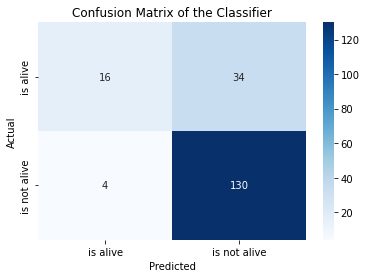

In [25]:
#  visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_predicting,
          labels = ['is alive', 'is not alive'])

In [26]:
# (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_predicting).round(decimals = 4))


# saving AUC score for later
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_predicting).round(decimals = 4)

0.6451


In [27]:
# zipping each feature name to its coefficient
logreg_model_values = zip(game[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_list = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_list.append(val)
    

# checking the results
for pair in logreg_model_list:
    print(pair)

('intercept', 1.09)
('male', -0.65)
('book1_A_Game_Of_Thrones', -0.59)
('book2_A_Clash_Of_Kings', 1.61)
('book3_A_Storm_Of_Swords', -0.26)
('book4_A_Feast_For_Crows', -0.32)
('book5_A_Dance_with_Dragons', -0.08)
('popularity', -1.83)
('Ironborn', 0.4)
('Braavosi', 0.28)
('Valyrian', -1.9)
('FreeFolk', -0.71)
('Northmen', 0.36)
('Dornish', 0.16)
('Vale', 0.33)
('has_no_title', -0.01)
('has_no_house', 0.61)


In [28]:
########################################
# plotting feature importances
########################################
def pfi(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    number_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='left')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("feature_importance")
    plt.ylabel("feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [29]:
# classification tree object
full_tree = DecisionTreeClassifier()


# fitting training data
full_tree_fitting = full_tree.fit(x_train, y_train)


# prediction of new data
full_tree_prediction = full_tree_fitting.predict(x_test)


# model score
print('Full Tree Training ACCURACY:', full_tree_fitting.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fitting.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_prediction).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fitting.score(x_train, y_train).round(4) 
full_tree_test_score  = full_tree_fitting.score(x_test, y_test).round(4)   


# saving auc
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_prediction).round(4) # auc

Full Tree Training ACCURACY: 0.9516
Full Tree Testing ACCURACY : 0.7337
Full Tree AUC Score: 0.6416


In [30]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_prediction).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 21
True Positives : 113



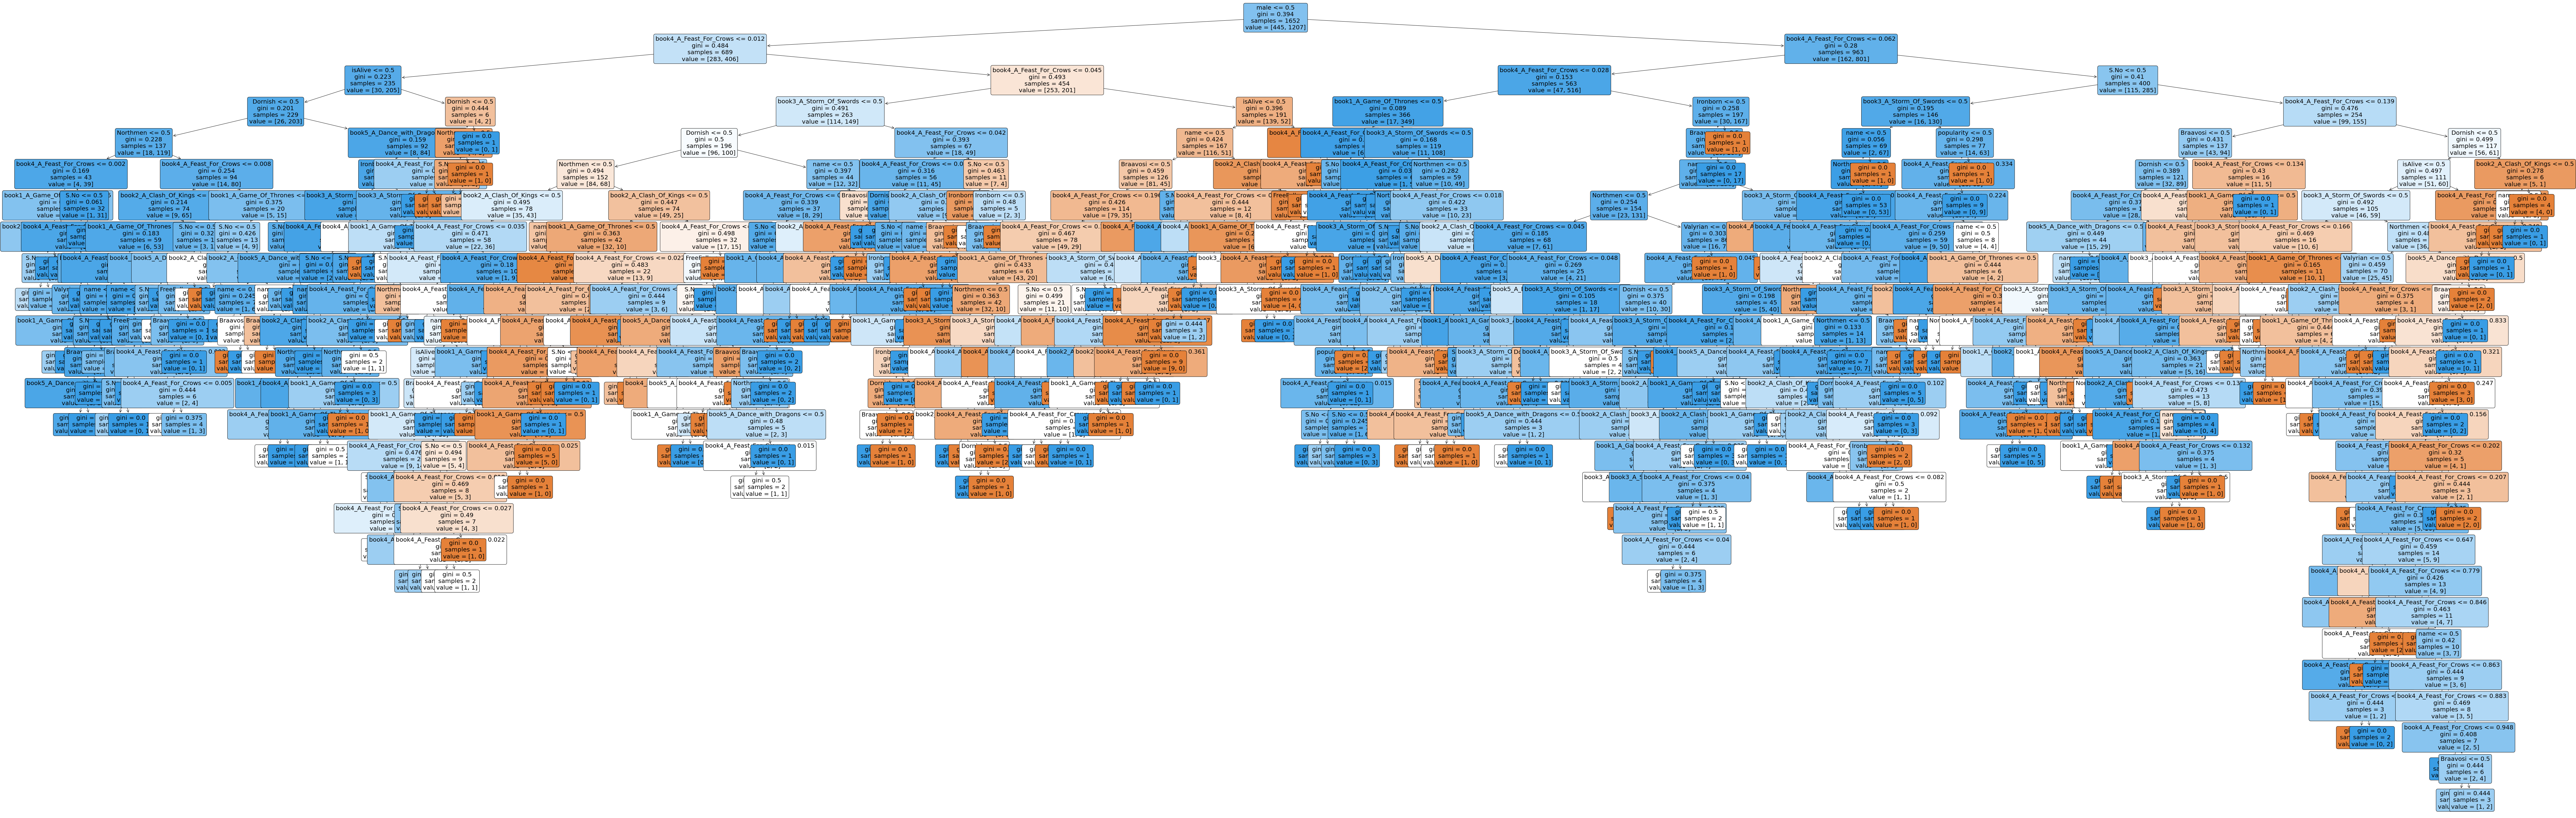

In [31]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fitting, 
          feature_names = game.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 20)


# rendering the plot
plt.show()

In [32]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 7,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.8033
Testing  ACCURACY: 0.7663
AUC Score        : 0.6703


In [33]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 16
True Positives : 118



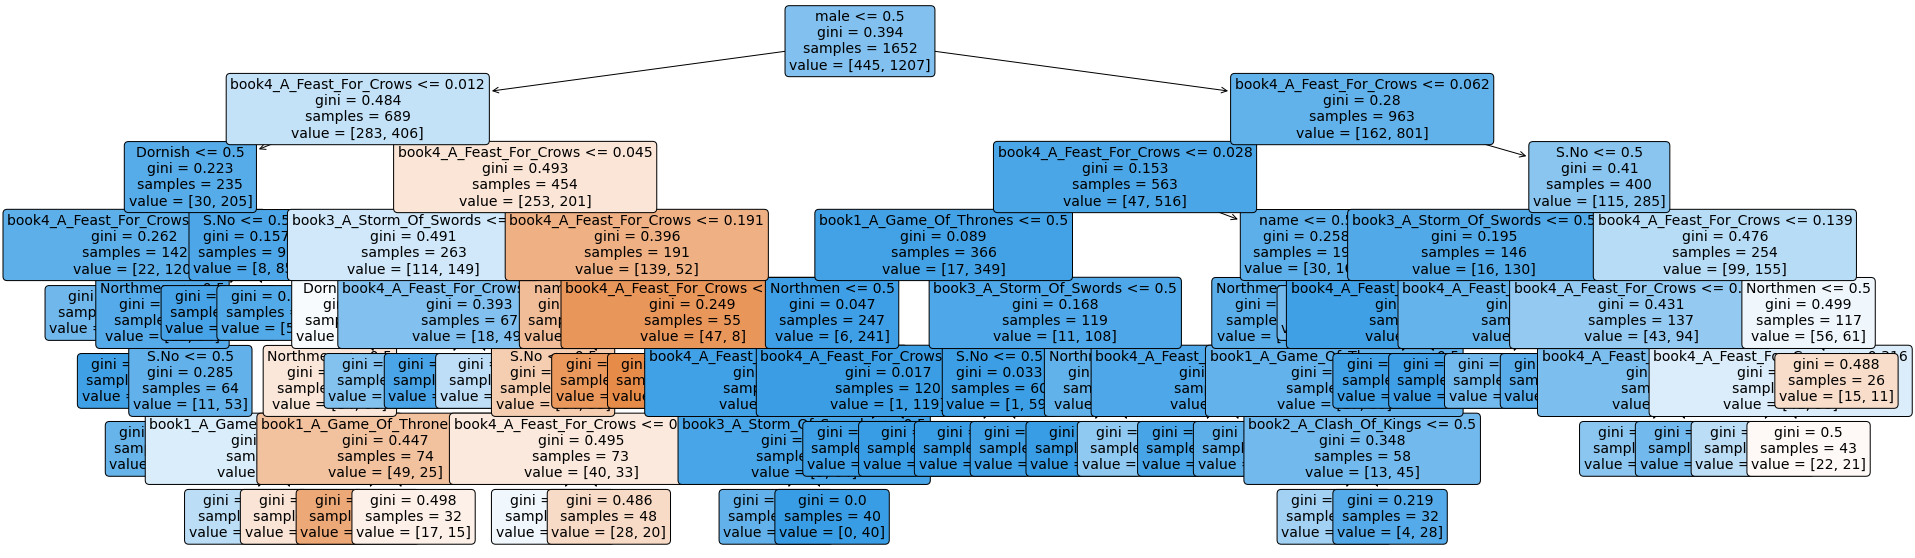

In [34]:
# setting figure size
plt.figure(figsize=(32, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned, # changing to pruned_tree_fit
          feature_names = game.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [35]:
##################
# HAVING ERROS IN THIS CELL - knn_pred is not created

# calling the visual_cm function
#visual_cm(true_y = y_test,
#          pred_y = knn_pred,
#          labels = ['is alive', 'is not alive'])


In [36]:
# final model output
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_training_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_testing_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a df
model_performance = pd.DataFrame(model_performance)


# exporting model results to excel
model_performance.to_excel('./__results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Pruned Tree   0.6703         (23, 27, 16, 118)

